In [3]:
#importing some useful packages
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import math
import cv2
import time as time
from sklearn.preprocessing import OneHotEncoder
from sklearn.cross_validation import train_test_split
import numpy as np
%matplotlib inline
import tensorflow as tf
import prettytensor as pt
from PIL import Image
import time
from datetime import timedelta
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix

In [4]:
def OHE_labels(Y_tr,N_classes):
    OHC = OneHotEncoder()
    
    Y_ohc = OHC.fit(np.arange(N_classes).reshape(-1, 1))
    Y_labels = Y_ohc.transform(Y_tr.reshape(-1, 1)).toarray()
    return Y_labels

In [5]:
# Load pickled data
import pickle


# TODO: fill this in based on where you saved the training and testing data
training_file = 'train.p'
testing_file = 'test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']
labels_train = OHE_labels(y_train,43)
labels_test = OHE_labels(y_test,43)

In [6]:
def check_OHE(cls,y):
    check = np.linalg.norm(np.argmax(cls,axis=1)-y)
    if check == 0:
        print('One hot encoding correct, ok to proceed')
    else:
        print('One hot encoding doesnt match the output, check code!!!')


In [7]:
check_OHE(labels_test,y_test)
check_OHE(labels_train,y_train)

One hot encoding correct, ok to proceed
One hot encoding correct, ok to proceed


In [8]:
### To start off let's do a basic data summary.

# TODO: number of training examples
n_train = len(y_train)

# TODO: number of testing examples
n_test = len(y_test)

# TODO: what's the shape of an image?
image_shape = np.shape(X_train[1])
# TODO: how many classes are in the dataset
n_classes = len(np.unique(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


In [11]:
def plot_random_3C(n_row,n_col,X,y):

    plt.figure(figsize = (11,8))
    gs1 = gridspec.GridSpec(n_row,n_row)
    gs1.update(wspace=0.01, hspace=0.02) # set the spacing between axes. 

    for i in range(n_row*n_col):
        # i = i + 1 # grid spec indexes from 0
        ax1 = plt.subplot(gs1[i])
        plt.axis('on')
        ax1.set_xticklabels([])
        ax1.set_yticklabels([])
        ax1.set_aspect('equal')
        #plt.subplot(4,11,i+1)
        ind_plot = np.random.randint(1,len(y))
        plt.imshow(X[ind_plot])
        plt.text(2,4,str(y[ind_plot]),
             color='k',backgroundcolor='c')
        plt.axis('off')
    plt.show()
def plot_random_1C(n_row,n_col,X,y):

    plt.figure(figsize = (11,8))
    gs1 = gridspec.GridSpec(n_row,n_row)
    gs1.update(wspace=0.01, hspace=0.02) # set the spacing between axes. 

    for i in range(n_row*n_col):
        # i = i + 1 # grid spec indexes from 0
        ax1 = plt.subplot(gs1[i])
        plt.axis('on')
        ax1.set_xticklabels([])
        ax1.set_yticklabels([])
        ax1.set_aspect('equal')
        #plt.subplot(4,11,i+1)
        ind_plot = np.random.randint(1,len(y))
        plt.imshow(X[ind_plot],cmap='gray')
        plt.text(2,4,str(y[ind_plot]),
             color='k',backgroundcolor='c')
        plt.axis('off')
    plt.show()   
def plot_random_preprocess(n_row,n_col,X,y):

    plt.figure(figsize = (11,8))
    gs1 = gridspec.GridSpec(n_row,n_row)
    gs1.update(wspace=0.01, hspace=0.02) # set the spacing between axes. 

    for i in range(n_row*n_col):
        # i = i + 1 # grid spec indexes from 0
        ax1 = plt.subplot(gs1[i])
        plt.axis('on')
        ax1.set_xticklabels([])
        ax1.set_yticklabels([])
        ax1.set_aspect('equal')
        #plt.subplot(4,11,i+1)
        ind_plot = np.random.randint(1,len(y))
        plt.imshow(pre_process_image(X[ind_plot]),cmap='gray')
        plt.text(2,4,str(y[ind_plot]),
             color='k',backgroundcolor='c')
        plt.axis('off')
    plt.show()
def pre_process_image(image):
    
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    image = cv2.resize(image, (img_resize,img_resize),interpolation = cv2.INTER_CUBIC)
    #kernel = np.ones((5,5),np.float32)/50
    #image = cv2.filter2D(image,-1,kernel)
    return image

In [8]:
image = X_train[0]


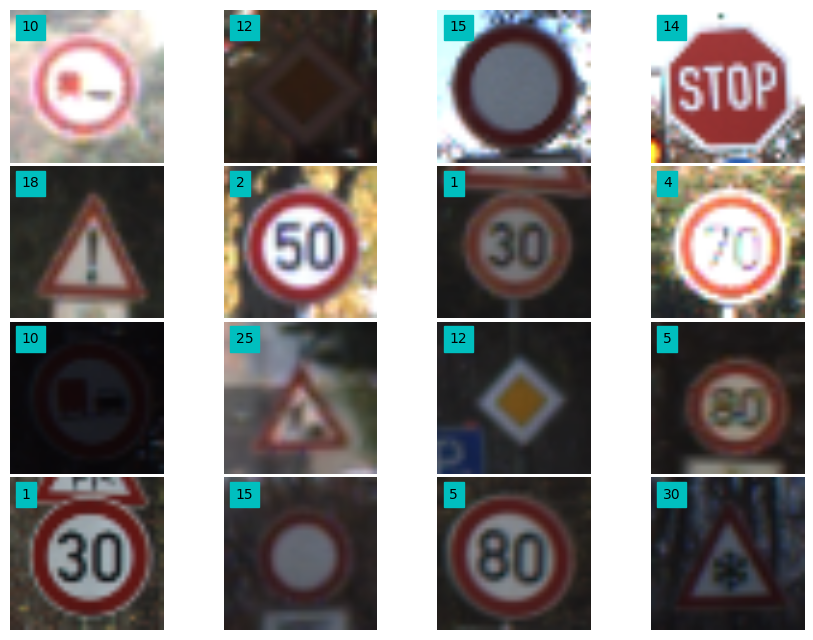

In [9]:
plot_random_3C(4,4,X_train,y_train)

In [10]:
img_resize = 32
N_classes = 43
image_shape = (img_resize,img_resize)
img_size_flat = img_resize*img_resize


image_GS_train = np.array([pre_process_image(X_train[i]) for i in range(len(X_train))],
                          dtype = np.float32)
image_GS_test = np.array([pre_process_image(X_test[i]) for i in range(len(X_test))],
                         dtype = np.float32)

# image_GS_train = X_train
# image_GS_test = X_test

In [13]:
img_resize = 32
for img in X_train:
    pre_process_image(img)

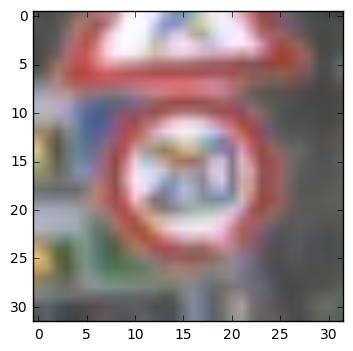

In [15]:
plt.imshow(X_train[0])

In [11]:
image_flat_train = image_GS_train.reshape((-1,img_size_flat))
image_flat_test  = image_GS_test.reshape((-1,img_size_flat))

In [12]:
len(image_flat_train)


39209

In [13]:
print(32*32)

1024


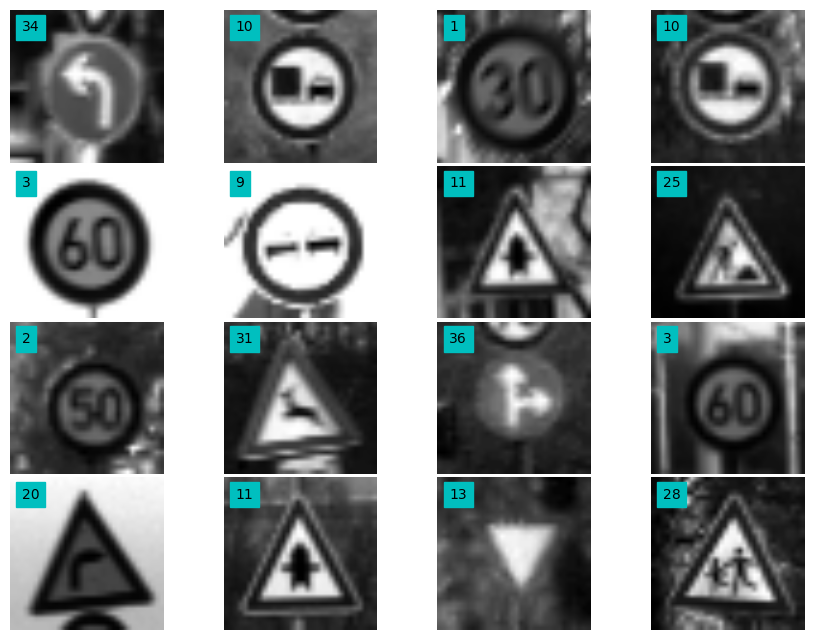

In [14]:
plot_random_1C(4,4,image_GS_train,y_train)

In [15]:
data_i = [[i,sum(y_train == i)] for i in range(len(np.unique(y_train)))]
data_i_sorted = sorted(data_i, key=lambda x: x[1])

In [16]:
data_pd = pd.read_csv('signnames.csv')

In [17]:
data_pd['Occurance'] = pd.Series(np.asarray(data_i_sorted).T[1], index=np.asarray(data_i_sorted).T[0])
data_pd_sorted = data_pd.sort_values(['Occurance'],ascending=[0]).reset_index()
data_pd_sorted = data_pd_sorted.drop('index', 1)


In [18]:
data_pd_sorted.head(10)

,ClassId,SignName,Occurance
0,2,Speed limit (50km/h),2250
1,1,Speed limit (30km/h),2220
2,13,Yield,2160
3,12,Priority road,2100
4,38,Keep right,2070
5,10,No passing for vechiles over 3.5 metric tons,2010
6,4,Speed limit (70km/h),1980
7,5,Speed limit (80km/h),1860
8,25,Road work,1500
9,9,No passing,1470


In [19]:
data_pd_sorted.tail(10)

,ClassId,SignName,Occurance
33,39,Keep left,300
34,29,Bicycles crossing,270
35,24,Road narrows on the right,270
36,41,End of no passing,240
37,42,End of no passing by vechiles over 3.5 metric ...,240
38,32,End of all speed and passing limits,240
39,27,Pedestrians,240
40,37,Go straight or left,210
41,19,Dangerous curve to the left,210
42,0,Speed limit (20km/h),210


<Container object of 43 artists>

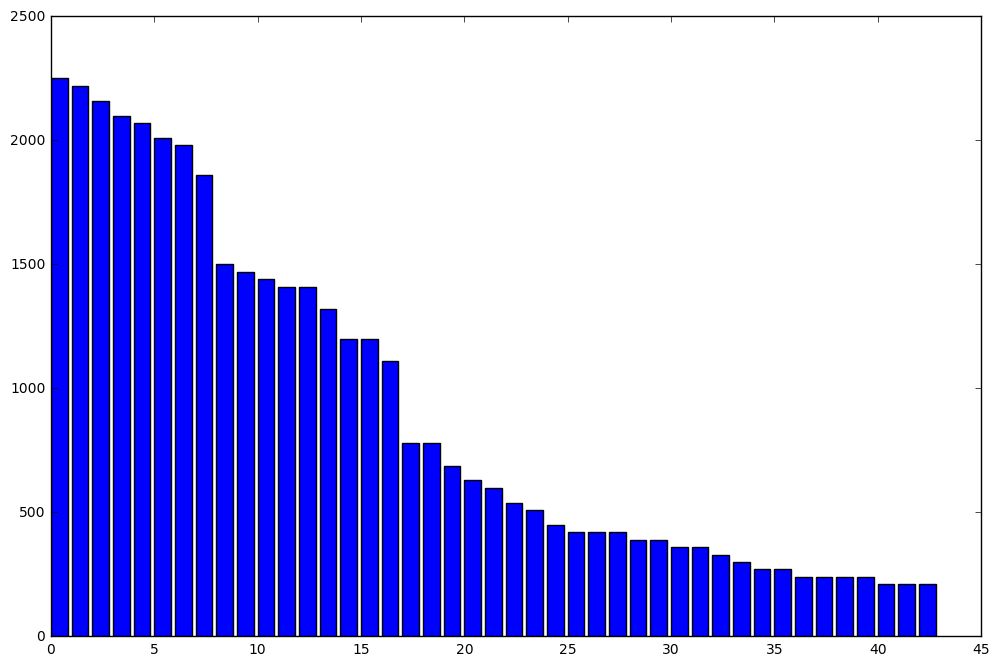

In [20]:
plt.figure(figsize=(12,8))
plt.bar(range(43),height=data_pd_sorted["Occurance"])

In [21]:
def random_batch():
    # Number of images in the training-set.
    num_images = len(image_flat_train)

    # Create a random index.
    idx = np.random.choice(num_images,
                           size=batch_size,
                           replace=False)

    # Use the random index to select random images and labels.
    features_batch = image_flat_train[idx, :]
    labels_batch = labels_train[idx, :]

    return features_batch, labels_batch

In [22]:
batch_size = 2
features_batch, labels_batch = random_batch()

In [23]:
# Defining place holders for features and labels

features = tf.placeholder(tf.float32,[None,img_size_flat])
labels_true = tf.placeholder(tf.float32,[None,N_classes])
labels_true_cls = tf.placeholder(tf.int64,[None])

In [24]:
weights = tf.Variable(tf.zeros([img_size_flat,N_classes]))
biases  = tf.Variable(tf.zeros([N_classes]))

In [25]:
logits = tf.matmul(features,weights)+biases

In [26]:
labels_pred = tf.nn.softmax(logits)
labels_pred_cls = tf.argmax(labels_pred,dimension = 1)

In [27]:
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits = logits,
                                                       labels = labels_true)
cost = tf.reduce_mean(cross_entropy)

In [28]:
#optimizer = tf.train.GradientDescentOptimizer(learning_rate = 0.5).minimize(cost)
optimizer = tf.train.AdagradOptimizer(learning_rate = 1e-2).minimize(cost)

In [29]:
correct_prediction = tf.equal(labels_pred_cls,labels_true_cls)
accuracy = tf.reduce_mean(tf.cast(correct_prediction,tf.float32))

In [30]:
session = tf.Session()

In [31]:
session.run(tf.initialize_all_variables())

In [32]:
batch_size = 256

In [33]:
def optimize(num_iterations):
    for i in range(num_iterations):
        # Get batch for training
        features_batch, labels_true_batch = random_batch()
        feed_dict_batch = {features:features_batch,
                    labels_true: labels_true_batch}
        session.run(optimizer,feed_dict = feed_dict_batch)
        

In [34]:
feed_dict_test = {features: image_flat_test,
                 labels_true: labels_test,
                 labels_true_cls:y_test}


In [35]:
def print_accuracy():
    acc = session.run(accuracy,feed_dict=feed_dict_test)
    print("Accuracy on test set: {0:1%}",format(acc))
    
def print_confusion_matrix():
    labels_cls_pred = session.run(labels_pred_cls,feed_dict=feed_dict_test)
    cm = confusion_matrix(y_true = y_test,y_pred = labels_cls_pred)
    print(cm)
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)

    # Make various adjustments to the plot.
    plt.tight_layout()
    plt.colorbar()
    tick_marks = np.arange(N_classes)
    plt.xticks(tick_marks, range(N_classes))
    plt.yticks(tick_marks, range(N_classes))
    plt.xlabel('Predicted')
    plt.ylabel('True')
    
def plot_error_examples():
    correct,labels_cls_pred = session.run([correct_prediction,labels_pred_cls],
                                          feed_dict=feed_dict_test)
    incorrect = (correct == False)
    X_incorrect = X_test[incorrect]
    y_incorrect = y_test[incorrect]
    y_pred = labels_cls_pred[incorrect]
    
    plot_random_3C(3,3,X_incorrect,y_incorrect)

def plot_weights():
    # Get the values for the weights from the TensorFlow variable.
    w = session.run(weights)
    
    # Get the lowest and highest values for the weights.
    # This is used to correct the colour intensity across
    # the images so they can be compared with each other.
    w_min = np.min(w)
    w_max = np.max(w)

    # Create figure with 3x4 sub-plots,
    # where the last 2 sub-plots are unused.
    fig, axes = plt.subplots(3, 4)
    fig.subplots_adjust(hspace=0.3, wspace=0.3)

    for i, ax in enumerate(axes.flat):
        # Only use the weights for the first 10 sub-plots.
        if i<13:
            # Get the weights for the i'th digit and reshape it.
            # Note that w.shape == (img_size_flat, 10)
            image = w[:, i].reshape(image_shape)

            # Set the label for the sub-plot.
            ax.set_xlabel("Weights: {0}".format(i))

            # Plot the image.
            ax.imshow(image, vmin=w_min, vmax=w_max, cmap='seismic')

        # Remove ticks from each sub-plot.
        ax.set_xticks([])
        ax.set_yticks([])

[[ 60   0   0 ...,   0   0   0]
 [720   0   0 ...,   0   0   0]
 [750   0   0 ...,   0   0   0]
 ..., 
 [ 90   0   0 ...,   0   0   0]
 [ 60   0   0 ...,   0   0   0]
 [ 90   0   0 ...,   0   0   0]]


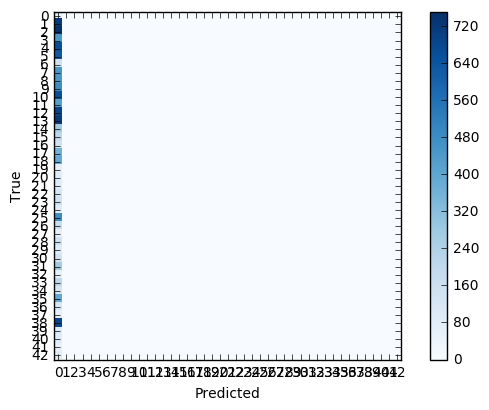

In [36]:
print_confusion_matrix()

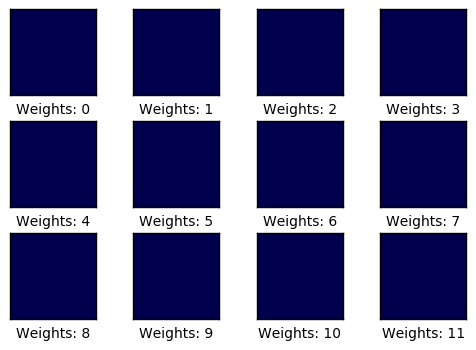

In [37]:
plot_weights()

In [43]:
session.run(tf.initialize_all_variables())
optimize(num_iterations=100)

In [44]:
print_accuracy()

Accuracy on test set: {0:1%} 0.3413301706314087


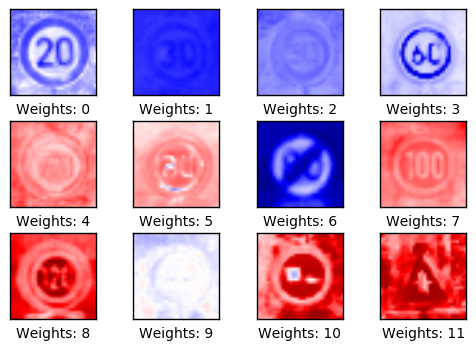

In [40]:
plot_weights()

[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]]


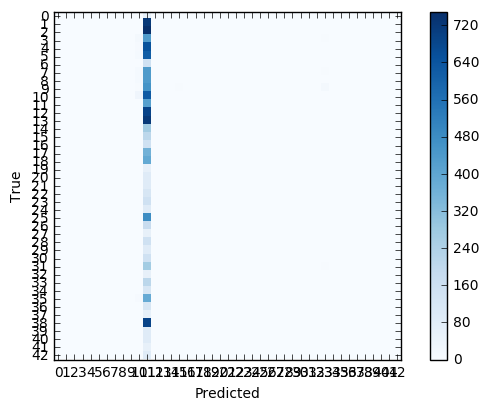

In [41]:
print_confusion_matrix()

In [42]:
# session.close()